In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, header=0, parse_dates=[0], index_col=0, squeeze=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15364\1475983942.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv(url, header=0, parse_dates=[0], index_col=0, squeeze=True)


In [4]:
# Displaying the first few rows of the dataset
print(df.head())

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64


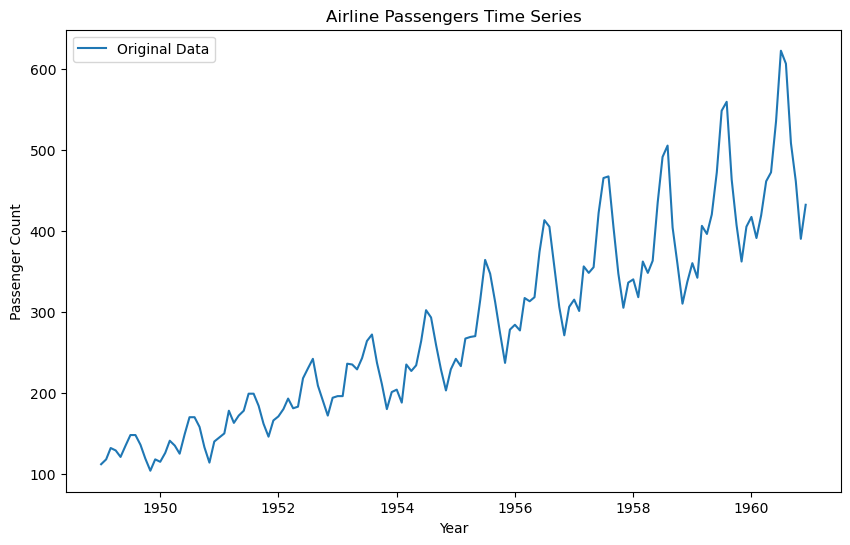

In [5]:
# Plotting the time series data
plt.figure(figsize=(10, 6))
plt.plot(df, label='Original Data')
plt.title('Airline Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()

In [6]:
# Train-Test Split
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [7]:
# ARIMA Model
order = (5, 1, 0) 
model = ARIMA(train, order=order)
model_fit = model.fit()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [9]:
# Forecasting
forecast = model_fit.forecast(len(test))

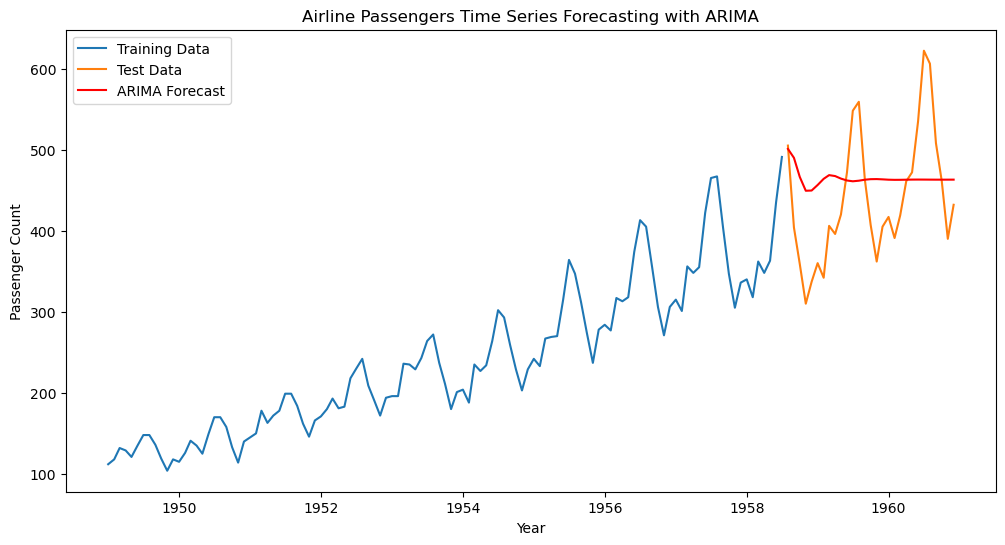

In [10]:
# Plotting Results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red')
plt.title('Airline Passengers Time Series Forecasting with ARIMA')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()


In [11]:
# Evaluation
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6506.672063895472


In [12]:
data_min = df.min()
data_max = df.max()

print(f"Minimum value in the dataset: {data_min}")
print(f"Maximum value in the dataset: {data_max}")

Minimum value in the dataset: 104
Maximum value in the dataset: 622


In [13]:
#Comparing MSE and RMSE 
import numpy as np

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 80.66394525372208
